In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sorted_months_weekdays import *
import matplotlib.ticker as mticker
from sort_dataframeby_monthorweek import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Call global to pull in all csv files.
csvFiles = glob.glob('*.csv')

# Create a data frame to hold the csv files.
combinedDf = pd.DataFrame()

# Loop through the csv files adding them to the data frame, 12 used.
for file in csvFiles:
    df = pd.read_csv(file)
    combinedDf = pd.concat([combinedDf, df], ignore_index=True)


In [3]:
# Ensure the data loaded in properly.
combinedDf.head()

,Last Name,First Name,Middle Initial,UIN,BDGNBR,Access Type,TOA,POA,TOD,POD,...,Visitee Last Name,Visitee First Name,Meeting Location,Meeting Room,Caller Last Name,Caller First Name,Caller Room,Release Date,CALLER_ROOM,RELEASEDATE
0,A,HARLEY,M,U82096,NaN,VA,NaN,NaN,NaN,NaN,...,Lurie,Kathryn,OEOB,SMS Large,MILLS,MORGAN,NaN,3/30/2024,NaN,NaN
1,AABERGSOMOGYI,MARTINA,S,U84967,NaN,VA,Dec 4 2023 2:46PM,NaN,NaN,NaN,...,Feldmayer,James,OEOB,236,ASKEW,SIMONE,NaN,3/30/2024,NaN,NaN
2,AAGAARD,ANDREW,L,U91156,NaN,VA,Dec 10 2023 8:09PM,NaN,NaN,NaN,...,Office,Visitors,WH,EW TOUR,WAVES,VISITORSOFFICE,NaN,3/30/2024,NaN,NaN
3,AAL,MICHAEL,J,U80167,NaN,VA,Dec 5 2023 11:40AM,NaN,NaN,NaN,...,Office,Visitors,WH,EW TOUR,WAVES,VISITORSOFFICE,NaN,3/30/2024,NaN,NaN
4,AAL,SABINE,N,U80167,NaN,VA,Dec 5 2023 11:40AM,NaN,NaN,NaN,...,Office,Visitors,WH,EW TOUR,WAVES,VISITORSOFFICE,NaN,3/30/2024,NaN,NaN


In [4]:
# Check for na values.
print(combinedDf.isna().sum())

Last Name                      64
First Name                      5
Middle Initial                514
UIN                           514
BDGNBR                     736921
Access Type                     0
TOA                        245041
POA                        834910
TOD                        834915
POD                        767203
Appointment Made Date           1
Appointment Start Date          0
Appointment End Date            0
Appointment Cancel Date    842941
Total People                  514
Last Updated By                 0
POST                            0
Last Entry Date                 0
Terminal Suffix                 0
Visitee Last Name               1
Visitee First Name          60026
Meeting Location                0
Meeting Room                    9
Caller Last Name                0
Caller First Name               0
Caller Room                843216
Release Date                80344
CALLER_ROOM                843216
RELEASEDATE                762872
dtype: int64


In [5]:
# Check the shape of the data frame.
combinedDf.shape

(843216, 29)

In [6]:
# Drop columns that are almost completly na values.
combinedDf.drop(['RELEASEDATE', 'CALLER_ROOM', 'Caller Room', 'Appointment Cancel Date', 'POD', 'TOD'], axis=1, inplace=True)

In [7]:
# obtain the mean for total people.
mean_value = combinedDf['Total People'].mean()

# Fill NA values for total people with the mean.
combinedDf['Total People'].fillna(mean_value, inplace=True)

In [8]:
# Fill NA values for Visitee First Name with the mode.
combinedDf['Visitee First Name'].fillna(combinedDf['Visitee First Name'].mode().iloc[0], inplace=True)

# Forward fill the missing release dates.
combinedDf['Release Date'].fillna(method='ffill', inplace=True)

In [9]:
# Check to make sure the intended na values were filled.
print(combinedDf.isna().sum())

Last Name                     64
First Name                     5
Middle Initial               514
UIN                          514
BDGNBR                    736921
Access Type                    0
TOA                       245041
POA                       834910
Appointment Made Date          1
Appointment Start Date         0
Appointment End Date           0
Total People                   0
Last Updated By                0
POST                           0
Last Entry Date                0
Terminal Suffix                0
Visitee Last Name              1
Visitee First Name             0
Meeting Location               0
Meeting Room                   9
Caller Last Name               0
Caller First Name              0
Release Date                   0
dtype: int64


In [10]:
# Check the data frame data types.
combinedDf.dtypes

Last Name                  object
First Name                 object
Middle Initial             object
UIN                        object
BDGNBR                    float64
Access Type                object
TOA                        object
POA                        object
Appointment Made Date      object
Appointment Start Date     object
Appointment End Date       object
Total People              float64
Last Updated By            object
POST                       object
Last Entry Date            object
Terminal Suffix            object
Visitee Last Name          object
Visitee First Name         object
Meeting Location           object
Meeting Room               object
Caller Last Name           object
Caller First Name          object
Release Date               object
dtype: object

In [11]:
# Create a list of the date columns.
dtCol = ["Appointment Made Date", "Appointment Start Date", "Appointment End Date",
         "Last Entry Date", "Release Date"]

# Convert the dates from object to date time.
combinedDf[dtCol] = combinedDf[dtCol].apply(pd.to_datetime, errors='coerce')

In [12]:
# Check that the conversion to date time held.
print(combinedDf.dtypes)

Last Name                         object
First Name                        object
Middle Initial                    object
UIN                               object
BDGNBR                           float64
Access Type                       object
TOA                               object
POA                               object
Appointment Made Date     datetime64[ns]
Appointment Start Date    datetime64[ns]
Appointment End Date      datetime64[ns]
Total People                     float64
Last Updated By                   object
POST                              object
Last Entry Date           datetime64[ns]
Terminal Suffix                   object
Visitee Last Name                 object
Visitee First Name                object
Meeting Location                  object
Meeting Room                      object
Caller Last Name                  object
Caller First Name                 object
Release Date              datetime64[ns]
dtype: object


In [13]:
# Checking for unique visitor names. 

combinedDf["Visitee First Name"].unique()

array(['Kathryn', 'James', 'Visitors', ..., 'Bobby', 'Switchboard',
       'Duty'], dtype=object)

In [14]:
# Create a data frame consisting of release date, visitee first name and total people.

visits = combinedDf[['Release Date', 'Visitee First Name', 'Total People']]
visits.head()

,Release Date,Visitee First Name,Total People
0,2024-03-30,Kathryn,16.0
1,2024-03-30,James,6.0
2,2024-03-30,Visitors,50.0
3,2024-03-30,Visitors,4.0
4,2024-03-30,Visitors,4.0


In [15]:
# Add a new column taking in the month of the release date.

visits['month_abbr'] = visits['Release Date'].dt.strftime('%b')
visits.tail()

,Release Date,Visitee First Name,Total People,month_abbr
843211,2023-09-30,Amanda,6.0,Sep
843212,2023-09-30,Amanda,6.0,Sep
843213,2023-09-30,Amanda,6.0,Sep
843214,2023-09-30,Amanda,6.0,Sep
843215,2023-09-30,Amanda,1.0,Sep


In [16]:
# Obtain the sum of visitors per month.
sum_by_date = visits.groupby('month_abbr')['Total People'].sum()

# Convert this into a data frame
df = pd.DataFrame(sum_by_date)

# Reset the index.
df.reset_index(inplace=True)

# Sort the data by month.
sortedDf = Sort_Dataframeby_Month(df=df,monthcolumnname='month_abbr')
print(sortedDf)

  month_abbr  Total People
0        Jan  8.467598e+06
1        Feb  1.800024e+06
2        Mar  1.350219e+07
3        Jun  1.656030e+06
4        Jul  5.622885e+06
5        Aug  3.092131e+06
6        Sep  1.825768e+07
7        Oct  5.497288e+06
8        Nov  7.738850e+05
9        Dec  1.716682e+06


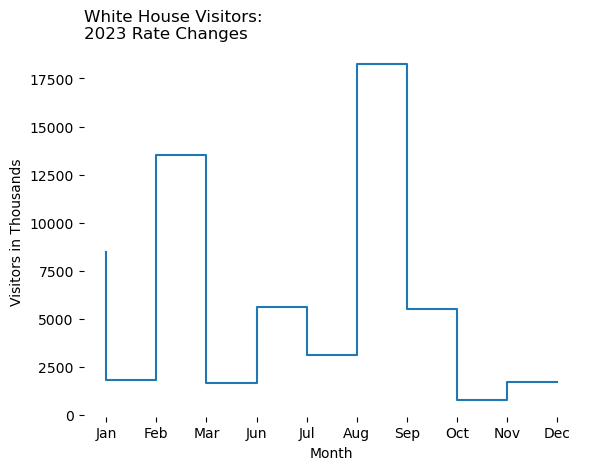

In [17]:
# Plot a step chart of all visitors.
# Total people divided by 1000 for a cleaner y-axis.
plt.step(sortedDf["month_abbr"], (sortedDf["Total People"]/1000))

# Set font to Arial.
plt.rcParams["font.family"] = "Arial"

# Create a title and labels.
plt.title("White House Visitors: \n2023 Rate Changes", loc='left')
plt.xlabel("Month")
plt.ylabel("Visitors in Thousands")

# Remove the graph box, save and show the plot.
plt.box(False)
plt.savefig('2023 visitor rates.jpg') 
plt.show()

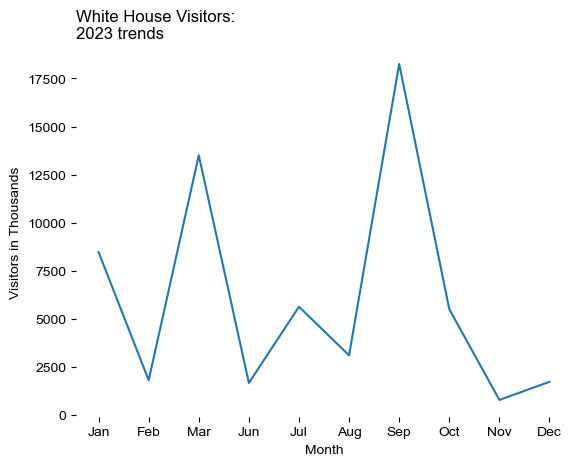

In [18]:
# Plot a line plot of all visitors.
# Total people divided by 1000 for a cleaner y-axis.
plt.plot(sortedDf["month_abbr"], (sortedDf["Total People"]/1000))

# Set font to Arial.
plt.rcParams["font.family"] = "Arial"

# Create a title and labels.
plt.title("White House Visitors: \n2023 trends", loc='left')
plt.xlabel("Month")
plt.ylabel("Visitors in Thousands")

# Remove the plot box, save and show the plot.
plt.box(False)
plt.savefig('2023 all visitors.jpg') 
plt.show()

In [19]:
# Create a a new DF to preserve the previously used data.
visitors = visits

# Rename all visitee first name to known if not visitor.
visitors.loc[visitors['Visitee First Name'] != 'Visitors', 'Visitee First Name'] = 'Known'

In [20]:
# Check to see if the change held.
visitors.head()

,Release Date,Visitee First Name,Total People,month_abbr
0,2024-03-30,Known,16.0,Mar
1,2024-03-30,Known,6.0,Mar
2,2024-03-30,Visitors,50.0,Mar
3,2024-03-30,Visitors,4.0,Mar
4,2024-03-30,Visitors,4.0,Mar


In [21]:
# Group the new dataframe by month and visitee name. 
grouped = visitors.groupby(['month_abbr', 'Visitee First Name'])

# Apply sum to the grouped total people.
totals = grouped['Total People'].sum()

# reset the index.
totals = totals.reset_index()

# Sort the data by month.
byDate = Sort_Dataframeby_Month(df=totals,monthcolumnname='month_abbr')
print(byDate)

   month_abbr Visitee First Name  Total People
0         Jan              Known  3.474181e+06
1         Jan           Visitors  4.993417e+06
2         Feb              Known  7.468920e+05
3         Feb           Visitors  1.053132e+06
4         Mar              Known  2.523450e+05
5         Mar           Visitors  1.324984e+07
6         Jun              Known  4.601490e+05
7         Jun           Visitors  1.195881e+06
8         Jul              Known  2.788202e+06
9         Jul           Visitors  2.834683e+06
10        Aug              Known  6.954200e+05
11        Aug           Visitors  2.396711e+06
12        Sep              Known  4.669883e+06
13        Sep           Visitors  1.358780e+07
14        Oct              Known  3.308109e+06
15        Oct           Visitors  2.189179e+06
16        Nov              Known  1.401510e+05
17        Nov           Visitors  6.337340e+05
18        Dec              Known  5.755280e+05
19        Dec           Visitors  1.141154e+06


In [22]:
#Make two new data frames. One with known visitors and the other unkown.

known = byDate[byDate['Visitee First Name'] == 'Known']
unknown = byDate[byDate['Visitee First Name'] == 'Visitors']

known.head()

,month_abbr,Visitee First Name,Total People
0,Jan,Known,3474181.0
2,Feb,Known,746892.0
4,Mar,Known,252345.0
6,Jun,Known,460149.0
8,Jul,Known,2788202.0


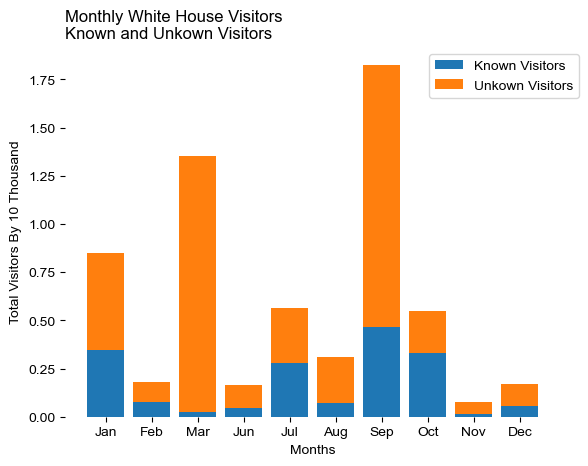

In [23]:
# Plot a stacked bar chart using subplots.
fig, ax = plt.subplots()

# Plot the first set of bars for known visitees.
ax.bar(known["month_abbr"], known["Total People"], label='Known Visitors')

# Plot the second set of bars on top of the first
ax.bar(unknown["month_abbr"], unknown["Total People"], bottom=known["Total People"], label='Unkown Visitors')

# Add labels,  legend, change font and remove plot box.
plt.rcParams["font.family"] = "Arial"
ax.set_xlabel('Months')
ax.set_ylabel('Total Visitors By 10 Thousand')
ax.set_title('Monthly White House Visitors \nKnown and Unkown Visitors', loc='left')
plt.box(False)

# Remove the 10e7 value from the top of the plot.
ax.yaxis.offsetText.set_visible(False)

# Move legend to the upper right.
ax.legend(bbox_to_anchor=(1.05, 1), loc = 'upper right')

# save and show the plot.
plt.savefig('stack plot.jpg') 
plt.show()

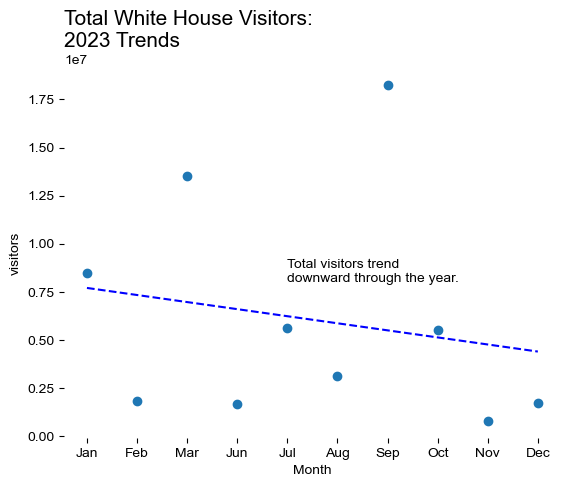

In [24]:
# Plot a scatter plot for all visitees.
plt.scatter(sortedDf["month_abbr"], sortedDf["Total People"])

# Calculate the variables for the line of best fit.
z = np.polyfit(df.index, sortedDf["Total People"], 1)
p = np.poly1d(z)

# Plot the line of best fit.
plt.plot(sortedDf["month_abbr"], p(sortedDf.index), "b--")

# remove plot box.
plt.box(False)

# Add labels, title, font.
plt.rcParams["font.family"] = "Arial"
plt.xlabel('Month')
plt.ylabel('visitors')
plt.title('Total White House Visitors: \n2023 Trends', loc = 'left', fontsize=15)

# Add a description of the line of best fit. 
plt.text(4, 8000000, 'Total visitors trend \ndownward through the year.')

# save and show the plot.
plt.savefig('all trend line.jpg') 
plt.show()

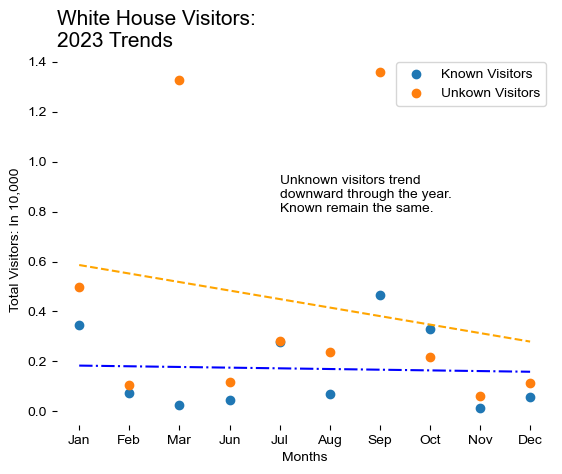

In [25]:
# Create a scatter plot of known and unkown visitors.
fig, ax = plt.subplots()

# Plot the first scatter plot. 
ax.scatter(known["month_abbr"], known["Total People"], label='Known Visitors')

# Calculate the variables for the line of best fit for the first scatter plot.
z = np.polyfit(known.index, known["Total People"], 1)
p = np.poly1d(z)

# Plot the line of best fit.
plt.plot(known["month_abbr"], p(known.index), "b-.")

# Plot the second scatter plot.
ax.scatter(unknown["month_abbr"], unknown["Total People"], label='Unkown Visitors')

# Calculate the variables for the line of best fit for the second scatter plot.
z = np.polyfit(unknown.index, unknown["Total People"], 1)
p = np.poly1d(z)

# Plot the line of best fit
plt.plot(unknown["month_abbr"], p(unknown.index), color='orange', linestyle='dashed')

# Remove plot box and the 10e7 from the y-axis.
plt.box(False)
ax.yaxis.offsetText.set_visible(False)

# Set font to Arial.
plt.rcParams["font.family"] = "Arial"

# Add labels and title.
ax.set_xlabel('Months')
ax.set_ylabel('Total Visitors: In 10,000')
ax.set_title('White House Visitors: \n2023 Trends', loc = 'left', fontsize=15)

# Add text describing the trends of the scatter plots.
plt.text(4, 8000000, 'Unknown visitors trend \ndownward through the year. \nKnown remain the same.')
ax.legend()

# Save and show the plot.
plt.savefig('split trendline.jpg') 
plt.show()

In [26]:
# Drop the months from the data frame.
byDate = byDate.drop('month_abbr', axis=1)

# Add the total people together for known and visitors.
sum_by_name = byDate.groupby('Visitee First Name')['Total People'].sum()

# Re-index the data frame.
sum_by_name = sum_by_name.reset_index()
sum_by_name.head()

,Visitee First Name,Total People
0,Known,1.711086e+07
1,Visitors,4.327553e+07


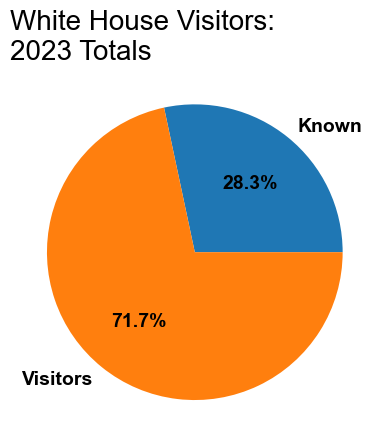

In [27]:
# Plot a pie chart of the total 2023 visitors. 

plt.pie(sum_by_name["Total People"], labels=sum_by_name["Visitee First Name"], 
        autopct='%1.1f%%', textprops={'weight': 'bold', 'fontsize': 14})

# Add a title
plt.title('White House Visitors: \n2023 Totals', fontsize=20, loc='left')
# Remove plot box.
plt.box(False)
# save and show the pie chart.
plt.savefig('piechart.jpg') 
plt.show() 

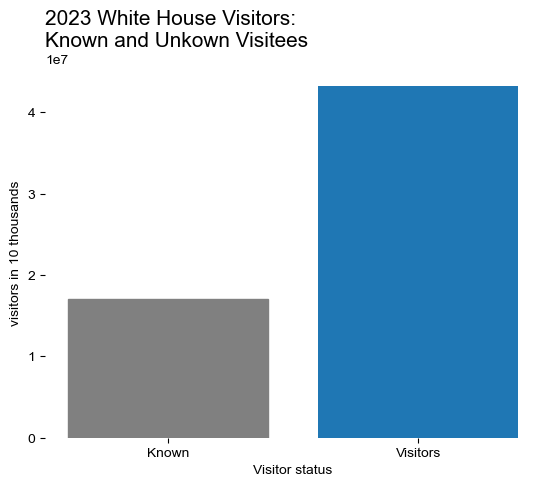

In [28]:
# Set index for the column of known visitors to be greyed out.
grey_out_index = 0

# Plot a barchart.
bar_chart = plt.bar(sum_by_name["Visitee First Name"], sum_by_name["Total People"])

# Set the first index to grey.
bar_chart[grey_out_index].set_color('grey')

# Creat titles and labels for the bar chart.
plt.title('2023 White House Visitors: \nKnown and Unkown Visitees', fontsize=15, loc='left')
plt.xlabel('Visitor status')
plt.ylabel('visitors in 10 thousands')

# Remove the plot box, save and show the plot.
plt.box(False)
plt.savefig('barchart.jpg') 
plt.show()